In [1]:
import MDAnalysis as mda
import MDAnalysis.analysis.msd as msd
import MDAnalysis.analysis.rdf as rdf
import numpy as np
import matplotlib.pyplot as plt
import os

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir('/home/rmo302/compclass/comp-lab-class/Week9/Data/prod')


In [3]:
#load data

topology = "kalj_T0.45_n360_v300_100000000_1.lammpstrj"

trajectories = ["kalj_T0.45_n360_v300_prod_100000000_1.unwrap.dcd","kalj_T0.475_n360_v300_prod_30000000_1.unwrap.dcd", 
                "kalj_T0.5_n360_v300_prod_10000000_1.unwrap.dcd","kalj_T0.55_n360_v300_prod_3000000_1.unwrap.dcd", 
                "kalj_T0.6_n360_v300_prod_1000000_1.unwrap.dcd","kalj_T0.65_n360_v300_prod_350000_1.unwrap.dcd",
                "kalj_T0.7_n360_v300_prod_180000_1.unwrap.dcd","kalj_T0.8_n360_v300_prod_150000_1.unwrap.dcd",
                "kalj_T0.9_n360_v300_prod_150000_1.unwrap.dcd","kalj_T1_n360_v300_prod_50000_1.unwrap.dcd",
                "kalj_T1.5_n360_v300_prod_10000_1.unwrap.dcd"]

temps = [0.45, 0.475, 0.5, 0.55, 0.6, 0.65, 0.7, 0.8, 0.9, 1.0, 1.5]



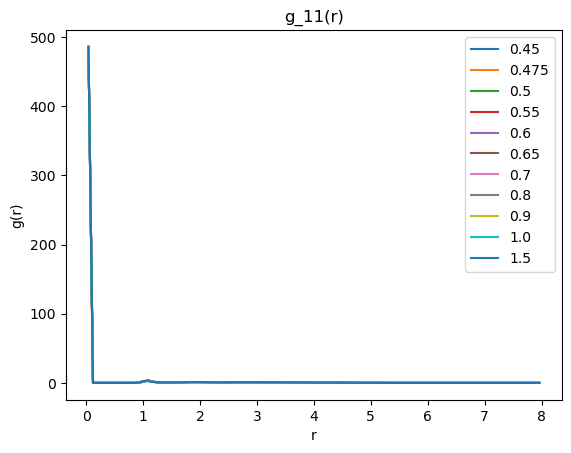

In [5]:
#g_11(r)

rdfs11 = []

for i in trajectories: 
    u = mda.Universe(topology, i, topology_format = 'LAMMPSDUMP')
    
    type1a = u.select_atoms('type 1')
    type1b = u.select_atoms('type 1')
    
    RDF11 = rdf.InterRDF(type1a, type1b, nbins=100, range=(0.0, 8.0))
    RDF11.run()
    
    rdfs11.append([RDF11.results.bins, RDF11.results.rdf])

for i, (x, y) in enumerate(rdfs11):
    plt.plot(x, y, label=f'{temps[i]}')

plt.legend()
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('g_11(r)')
plt.savefig('/home/rmo302/compclass/comp-lab-class/Week9/Figures/g_11(r).pdf')
plt.show()
    

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


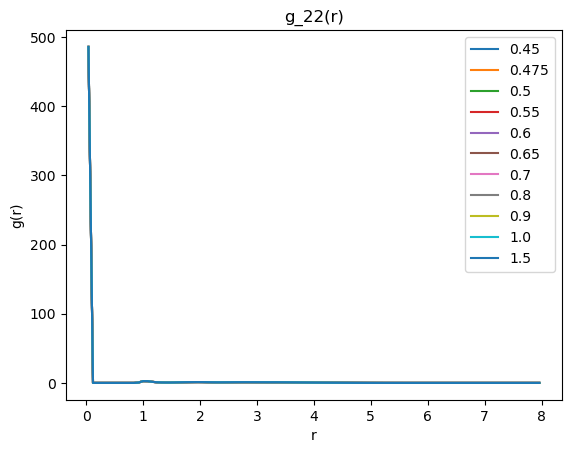

In [6]:
#g_22(r)

rdfs22 = []

for i in trajectories: 
    u = mda.Universe(topology, i, topology_format = 'LAMMPSDUMP')
    
    type2a = u.select_atoms('type 2')
    type2b = u.select_atoms('type 2')
    
    RDF22 = rdf.InterRDF(type1a, type1b, nbins=100, range=(0.0, 8.0))
    RDF22.run()
    
    rdfs22.append([RDF22.results.bins, RDF22.results.rdf])

for i, (x, y) in enumerate(rdfs22):
    plt.plot(x, y, label=f'{temps[i]}')

plt.legend()
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('g_22(r)')
plt.savefig('/home/rmo302/compclass/comp-lab-class/Week9/Figures/g_22(r).pdf')
plt.show()

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


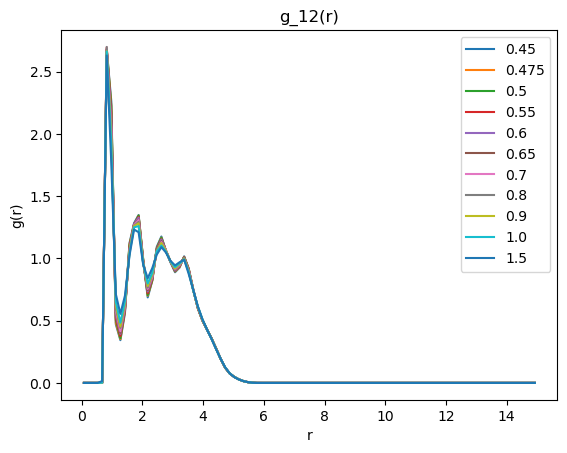

In [7]:
#g_12(r)

rdfs12 = []

for i in trajectories: 
    u = mda.Universe(topology, i, topology_format = 'LAMMPSDUMP')
    
    type1 = u.select_atoms('type 1')
    type2 = u.select_atoms('type 2')
    
    RDF12 = rdf.InterRDF(type1, type2, nbins=100)
    RDF12.run()
    
    rdfs12.append([RDF12.results.bins, RDF12.results.rdf])

for i, (x, y) in enumerate(rdfs12):
    plt.plot(x, y, label=f'{temps[i]}')

plt.legend()
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('g_12(r)')
plt.savefig('/home/rmo302/compclass/comp-lab-class/Week9/Figures/g_12(r).pdf')
plt.show()

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


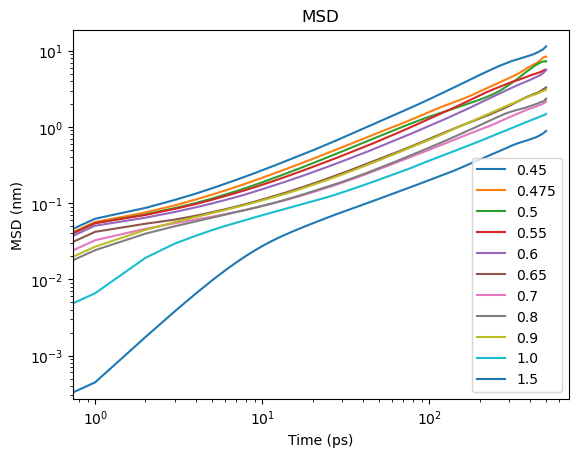

<Figure size 640x480 with 0 Axes>

In [8]:
#MSD
msd1 = []

for i in trajectories: 
    u = mda.Universe(topology, i, topology_format = 'LAMMPSDUMP')
    
    type1 = u.select_atoms('type 1')
    
    MSD = msd.EinsteinMSD(type1, msd_type = 'xyz', fft = "True")
    
    MSD.run()
    
    msd1.append(MSD.results.timeseries)

for t, j in enumerate (msd1):
    plt.loglog(j, label= f'{temps[t]}')
    
plt.xlabel("Time (ps)")
plt.ylabel("MSD (nm)")
plt.legend(loc = "lower right")
plt.title("MSD")
plt.show()
plt.savefig("/home/rmo302/compclass/comp-lab-class/Week9/Figures/MSD.pdf")


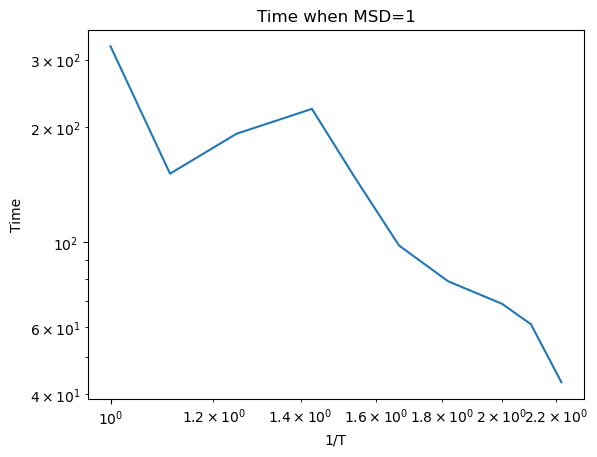

In [82]:
##MSD = 1

MSD1 = []
time = []
inv_T = []

for i in range(len(temps)-1):
    
    val = np.where(msd1[i]>1)[0][0]
    MSD1.append(val)
    #T = 1.5 does not have a MSD = 1
    inv_T.append(1/temps[i])
    
plt.loglog(inv_T, MSD1)
plt.xlabel("1/T")
plt.ylabel("Time")
plt.title("Time when MSD=1")
plt.savefig("/home/rmo302/compclass/comp-lab-class/Week9/Figures/MSD_1.pdf")